# TME 01 Estimation de densité

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import pandas as pd
from typing import Dict, Tuple, List

### Extraction des données

In [2]:
POI_FILENAME = "data/poi-paris.pkl"
parismap = mpimg.imread('data/paris-48.806-2.23--48.916-2.48.jpg')
## coordonnees GPS de la carte
xmin, xmax = 2.23, 2.48  # coord_x min et max
ymin, ymax = 48.806, 48.916  # coord_y min et max
coords = [xmin, xmax, ymin, ymax]

### Affichage des données

{'furniture_store': {'ChIJvQW3LzBu5kcR1K1RinPHWuo': ((48.86663159999999, 2.3316366), 2.2, 'Unopiu', ['furniture_store', 'home_goods_store', 'store', 'point_of_interest', 'establishment'], -1), 'ChIJPa034vBu5kcRgPhYMUxo0Dk': ((48.90328890000001, 2.339881399999999), -1, 'Olivier Hutzemakers', ['furniture_store', 'home_goods_store', 'store', 'point_of_interest', 'establishment'], -1), 'ChIJS2paJgVy5kcRsWnyhE-Ng4Y': ((48.84763299999999, 2.3753779), -1, 'Téodor', ['furniture_store', 'home_goods_store', 'store', 'point_of_interest', 'establishment'], -1), 'ChIJ5_Q5YZRv5kcRs3k9SIdrmtM': ((48.8798415, 2.2971538), 5, 'Féau and Co.', ['furniture_store', 'home_goods_store', 'store', 'point_of_interest', 'establishment'], -1), 'ChIJvw0d809w5kcRvg7fJrlayzE': ((48.8279332, 2.3090737), -1, 'Patoux Florence Marie-therese', ['furniture_store', 'home_goods_store', 'store', 'point_of_interest', 'establishment'], -1), 'ChIJ86G-5alt5kcRtPN69Wx3nsA': ((48.8890514, 2.4137347), 1, 'Au Salon Du Meuble', ['furn

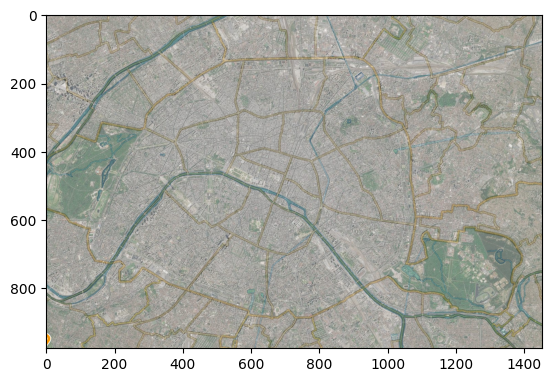

In [3]:
# Display Paris map
plt.imshow(parismap)

# Extraction of data
with open(POI_FILENAME, 'rb') as poi : 
    data=pickle.load(poi)

print(data)

In [10]:
# Extract coordinates from data
poi = data.keys()

# Dict containing type of poi and every instance of poi and their coordinates
coords={}    # dict[str : Dict[str:[(x,y)]]

for p in poi : 
    inst_poi = data[p]
    # Dict containing every instance of poi and their coordinates
    inst_d = {}
    for i_name, i_info in inst_poi.items() : 
        coord = i_info[0]
        if i_name in inst_d : 
            inst_d[i_name].append(coord)
        else : 
            inst_d[i_name] = [coord]
    coords[p] = inst_d

In [4]:
def load_poi(typepoi,fn=POI_FILENAME):
    """ Dictionaire POI, clé : type de POI, valeur : dictionnaire des POIs de ce type : (id_POI, [coordonnées, note, nom, type, prix])
    
    Liste des POIs : furniture_store, laundry, bakery, cafe, home_goods_store, 
    clothing_store, atm, lodging, night_club, convenience_store, restaurant, bar
    """
    poidata = pickle.load(open(fn, "rb"))
    data = np.array([[v[1][0][1],v[1][0][0]] for v in sorted(poidata[typepoi].items())])
    note = np.array([v[1][1] for v in sorted(poidata[typepoi].items())])
    return data,note

## Partie 1 - Classe densité

In [5]:
class Density(object):
    def fit(self,data):
        """
        Learn estimator with data given in parameters
        """
        pass
    def predict(self,data):
        """
        Precict density for each point given in data
        """
        pass
    def score(self, data : Dict[str, Dict[str, Tuple[Tuple[float], float, str, List[str], float]]])-> float:
        """
        Returns log_likelihood of data

        Parameters : 
            - self : Density object, instance of classe density
            - data : Dict[str, Dict[str, Tuple[Tuple[float], float, str, List[str], float]]]
        Returns : 
            - L : float, Loglikelihood of data
        """

        # Compute likelihood
        L = self.predict(data)

        # Replace 0 values by 1e-10
        L = np.where(L==0, 1e-10, L)

        # Compute loglikelihood
        LL=np.log(L)

        return LL

## Partie 2 - Méthode par histogramme

In [36]:
class Histogramme(Density):

    def __init__(self,steps=10):
        Density.__init__(self)
        self.steps = steps

    def fit(self,x):
        """
        Apprend l'histogramme de la densité sur les données train x

        Parameters : 
            - x : Dict[str, Dict[str, Tuple[Tuple[float], float, str, List[str], float]]]

        Returns : 
            - d : np.ndarray, (steps,steps) : the density for train data
        """
        # Init

        coords, data = load_poi("bar")   # Extract important data from x
        steps=self.steps       # Global variable
        print(data)
        # Create bins
        xmin, xmax = coords[:,0].min(), coords[:,0].max()
        ymin, ymax = coords[:,1].min(), coords[:,1].max()
        x_bins,y_bins = np.linspace(xmin,xmax,steps),np.linspace(ymin,ymax,steps)
    
        
        # Create density histogram
        hist, x_edges, y_edges = np.histogram2d(data, bins=[x_bins, y_bins])

        return hist
        

    def predict(self,x):
        #A compléter : retourne la densité associée à chaque point de x
        pass

In [37]:
h = Histogramme()
h.fit(data)

[ 4.1 -1.   4.7 ...  4.   3.7  4.3]


TypeError: histogram2d() missing 1 required positional argument: 'y'

### Fonctions Globales

In [ ]:
def get_density2D(f,data,steps=100):
    """ Calcule la densité en chaque case d'une grille steps x steps dont les bornes sont calculées à partir du min/max de data. Renvoie la grille estimée et la discrétisation sur chaque axe.
    """
    xmin, xmax = data[:,0].min(), data[:,0].max()
    ymin, ymax = data[:,1].min(), data[:,1].max()
    xlin,ylin = np.linspace(xmin,xmax,steps),np.linspace(ymin,ymax,steps)
    xx, yy = np.meshgrid(xlin,ylin)
    grid = np.c_[xx.ravel(), yy.ravel()]
    res = f.predict(grid).reshape(steps, steps)
    return res, xlin, ylin

def show_density(f, data, steps=100, log=False):
    """ Dessine la densité f et ses courbes de niveau sur une grille 2D calculée à partir de data, avec un pas de discrétisation de steps. Le paramètre log permet d'afficher la log densité plutôt que la densité brute
    """
    res, xlin, ylin = get_density2D(f, data, steps)
    xx, yy = np.meshgrid(xlin, ylin)
    plt.figure()
    show_img()
    if log:
        res = np.log(res+1e-10)
    plt.scatter(data[:, 0], data[:, 1], alpha=0.8, s=3)
    show_img(res)
    plt.colorbar()
    plt.contour(xx, yy, res, 20)


def show_img(img=parismap):
    """ Affiche une matrice ou une image selon les coordonnées de la carte de Paris.
    """
    origin = "lower" if len(img.shape) == 2 else "upper"
    alpha = 0.3 if len(img.shape) == 2 else 1.
    plt.imshow(img, extent=coords, aspect=1.5, origin=origin, alpha=alpha)
    ## extent pour controler l'echelle du plan



In [ ]:
# plt.ion()
# # Liste des POIs : furniture_store, laundry, bakery, cafe, home_goods_store, clothing_store, atm, lodging, night_club, convenience_store, restaurant, bar
# # La fonction charge la localisation des POIs dans geo_mat et leur note.
# geo_mat, notes = load_poi("bar")

# # Affiche la carte de Paris
# show_img()
# # Affiche les POIs
# plt.scatter(geo_mat[:,0],geo_mat[:,1],alpha=0.8,s=3)